In [1]:
"""
Created on Thu Jan  2 13:19:40 2025

@author: lauta
"""

# -*- coding: utf-8 -*-
"""
Análisis de peajes
Created on Fri Dec 27 17:37:41 2024

@author: lauta
"""

import pandas as pd
import numpy as np
import seaborn as sb
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

from datetime import datetime
from shapely.geometry import Point
from adjustText import adjust_text


# Configuración inicial
sb.set_theme(style="darkgrid")

In [2]:
def is_weekday(d=datetime.today()):
    return d.weekday() <= 4

In [3]:
df = pd.read_csv(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\2023_vehicular_traffic.csv")
pe = pd.read_csv(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\toll_coordinates.csv")

In [4]:
df["year"] = 2023
df["month"] = df["MES"]
df["day"] = df["DIA"]
df["date"] = pd.to_datetime(df[["year", "month", "day"]])

pe_coords = pe["coordenadas"].str.split(',', expand=True)
pe_coords.rename(columns={0: "long", 1: "lat"}, inplace=True)
pe = pe.join(pe_coords)

In [5]:
semana = df[df["date"].dt.dayofweek < 5].copy()
semana["DIA"] = semana["date"].dt.day_name()

finde = df[df["date"].dt.dayofweek >= 5].copy()
finde["DIA"] = finde["date"].dt.day_name()

dom = finde[finde["date"].dt.dayofweek == 6]
sab = finde[finde["date"].dt.dayofweek == 5]

In [6]:
pdom = dom.groupby("date", as_index=False)["PASOS"].sum()
psab = sab.groupby("date", as_index=False)["PASOS"].sum()
pf = finde.groupby("date", as_index=False)["PASOS"].sum()
o = semana.groupby("HORA", as_index=False)["PASOS"].sum()
of = finde.groupby("HORA", as_index=False)["PASOS"].sum()
h = semana.groupby("date", as_index=False)["PASOS"].sum()

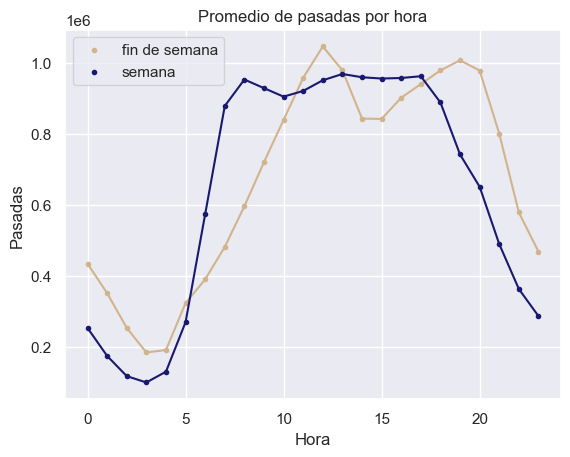

In [7]:
fig, ax = plt.subplots()
plt.scatter(of["HORA"], of["PASOS"]/2, color="tan", label="fin de semana",s=9)
plt.plot(of["HORA"], of["PASOS"]/2, color="tan")
#plt.axhline(y=of["PASOS"].mean(), color="tan", linestyle="--")
plt.scatter(o["HORA"], o["PASOS"]/7, color="midnightblue",label="semana",zorder = 4,s=9)
plt.plot(o["HORA"], o["PASOS"]/7, color="midnightblue")
#plt.axhline(y=o["PASOS"].mean(), color="midnightblue", linestyle="--")
plt.title("Promedio de pasadas por hora")
plt.xlabel("Hora")
plt.ylabel("Pasadas")
ax.legend()
plt.show()

#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\horas.pdf")



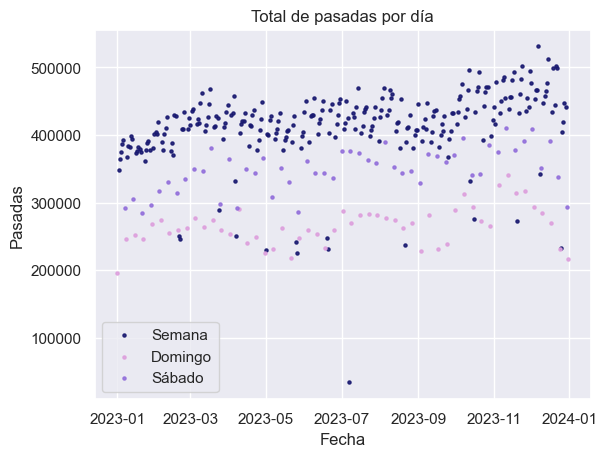

In [8]:
fig, ax = plt.subplots()
ax.set_title("Total de pasadas por día")
plt.scatter(h["date"], h["PASOS"], alpha=0.9, s=5, color="midnightblue", label="Semana")
plt.scatter(pdom["date"], pdom["PASOS"], alpha=0.9, s=5, color="plum", label="Domingo")
plt.scatter(psab["date"], psab["PASOS"], alpha=0.9, s=5, color="mediumpurple", label="Sábado")
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Pasadas")
plt.show()


#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\año.pdf")

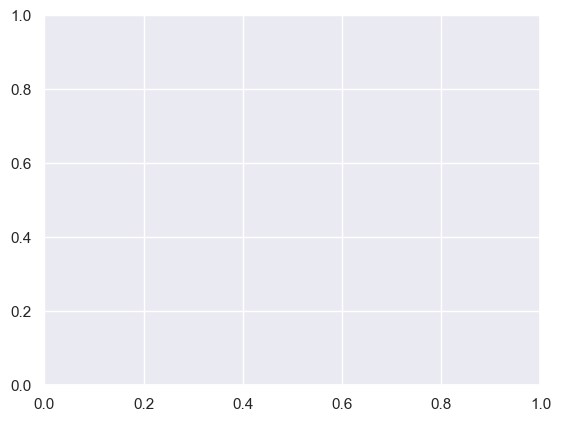

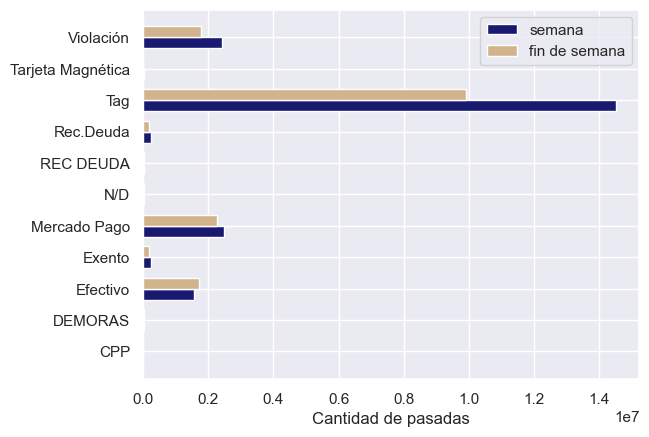

Promedio de infracciones en la semana:  11.2
Promedio de infracciones en el fin de semana:  11.05
Promedio de infracciones en total:  11.17
Promedio de efectivo en la semana:  7.21
Promedio de efectivo en el fin de semana:  10.72
Promedio de efectivo en total:  8.02


In [9]:

per=df.groupby("TIPO_COBRO")["PASOS"].mean()
#per.plot(kind="barh")

pers = semana.groupby("TIPO_COBRO")["PASOS"].sum()/5
#pers.plot(kind="barh")

perf = finde.groupby("TIPO_COBRO")["PASOS"].sum()/2
#perf.plot(kind="barh")
width = 0.35
x = np.arange(len(pers.index))

ax,fig=plt.subplots()

index = np.arange(5)
bar_width = 0.35

fig, ax = plt.subplots()
hbar_semana = ax.barh(x-width/2, pers, bar_width,
                label="semana",color = "midnightblue")

gbar_finde = ax.barh(x+width/2,perf,
                 bar_width, label="fin de semana",color="tan")

plt.yticks(x, pers.index)
ax.set_xlabel("Cantidad de pasadas")
ax.legend()
plt.show()


print("Promedio de infracciones en la semana: ", round(semana[semana["TIPO_COBRO"] == "Violación"]["PASOS"].sum()*100/(semana["PASOS"].sum()),2))

print("Promedio de infracciones en el fin de semana: ", round(finde[finde["TIPO_COBRO"] == "Violación"]["PASOS"].sum()*100/(finde["PASOS"].sum()),2))

print("Promedio de infracciones en total: ", round((df[df["TIPO_COBRO"] == "Violación"]["PASOS"].sum())*100/(df["PASOS"].sum()),2))


print("Promedio de efectivo en la semana: ", round(semana[semana["TIPO_COBRO"] == "Efectivo"]["PASOS"].sum()*100/(semana["PASOS"].sum()),2))

print("Promedio de efectivo en el fin de semana: ", round(finde[finde["TIPO_COBRO"] == "Efectivo"]["PASOS"].sum()*100/(finde["PASOS"].sum()),2))

print("Promedio de efectivo en total: ", round((df[df["TIPO_COBRO"] == "Efectivo"]["PASOS"].sum())*100/(df["PASOS"].sum()),2))


#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\barras1.pdf")

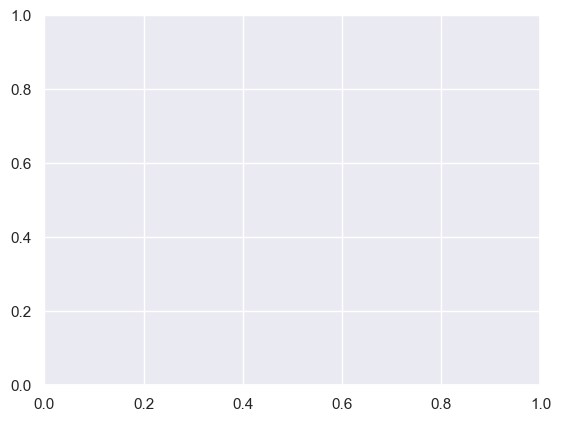

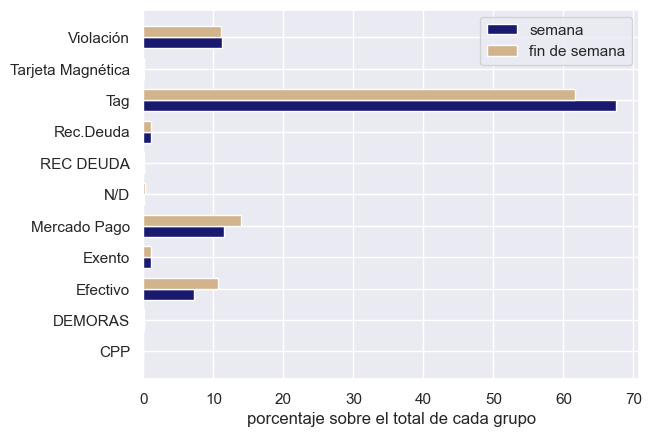

In [10]:


pers_tot = semana.groupby("TIPO_COBRO")["PASOS"].sum()/semana["PASOS"].sum()
#pers.plot(kind="barh")

perf_tot = finde.groupby("TIPO_COBRO")["PASOS"].sum()/finde["PASOS"].sum()
#perf.plot(kind="barh")
width = 0.35
x = np.arange(len(pers.index))

ax,fig=plt.subplots()

index = np.arange(5)
bar_width = 0.35

fig, ax = plt.subplots()
hbar_semana = ax.barh(x-width/2, pers_tot*100, bar_width,
                label="semana",color = "midnightblue")

gbar_finde = ax.barh(x+width/2,perf_tot*100,
                 bar_width, label="fin de semana",color="tan")

plt.yticks(x, pers.index)
ax.set_xlabel("porcentaje sobre el total de cada grupo")
ax.legend()

Fuera del horario 7-20HS se ubica el:  21.54%  de las infracciones


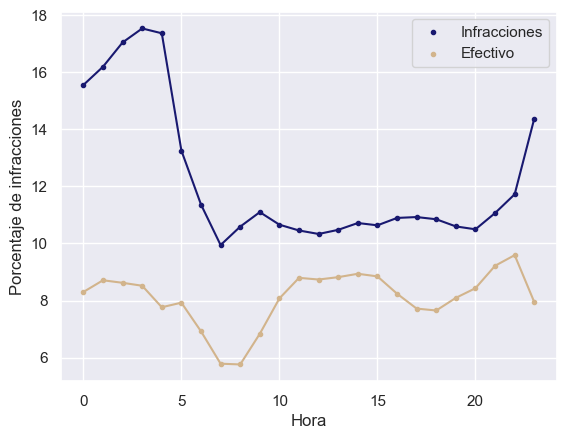

In [11]:

#infracciones
ptc = []
tc=df[df["TIPO_COBRO"] == "Violación"].groupby("HORA",as_index=False)["PASOS"].sum()
for p in tc["HORA"]:
    ptc.append(tc["PASOS"][p]*100/df.groupby("HORA",as_index=False)["PASOS"].sum()["PASOS"][p])
    
    
#efectivo    
etc = []
ec=df[df["TIPO_COBRO"] == "Efectivo"].groupby("HORA",as_index=False)["PASOS"].sum()
for p in ec["HORA"]:
    etc.append(ec["PASOS"][p]*100/df.groupby("HORA",as_index=False)["PASOS"].sum()["PASOS"][p])    
    
    
ax, fig = plt.subplots()
plt.plot(tc["HORA"],ptc,c="midnightblue")
plt.scatter(tc["HORA"],ptc,c="midnightblue",s=9, label = "Infracciones")
plt.ylabel("Porcentaje de infracciones")
plt.xlabel("Hora")

# Comparo con los pagos en efectivo


plt.plot(ec["HORA"],etc,c="tan")
plt.scatter(ec["HORA"],etc,c="tan",s=9, label = "Efectivo")

plt.legend()

print("Fuera del horario 7-20HS se ubica el: ",
      str(round((tc["PASOS"][0:6].sum()+tc["PASOS"][-4:-1].sum())*100/tc["PASOS"].sum(),2))+"%",
      " de las infracciones")



In [12]:
geometry = [Point(float(lat), float(long)) for lat, long in zip(pe_coords["lat"], pe_coords["long"])]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

In [13]:
violations = []
peajes = []

for i in pe["id_peaje"].unique():
    peaje_data = df[df["ID_PEAJE"] == i].groupby("TIPO_COBRO",as_index=False)["PASOS"].sum()
    if "Violación" in peaje_data["TIPO_COBRO"].value_counts():
        violations.append((peaje_data[peaje_data["TIPO_COBRO"]=="Violación"]["PASOS"].sum() * 100)/peaje_data["PASOS"].sum())
    else:
        violations.append(0)
    peajes.append(i)
    

print("Porcentaje promedio de infracciones: ",str(round(np.mean(violations),2)) + "%")

Porcentaje promedio de infracciones:  21.74%


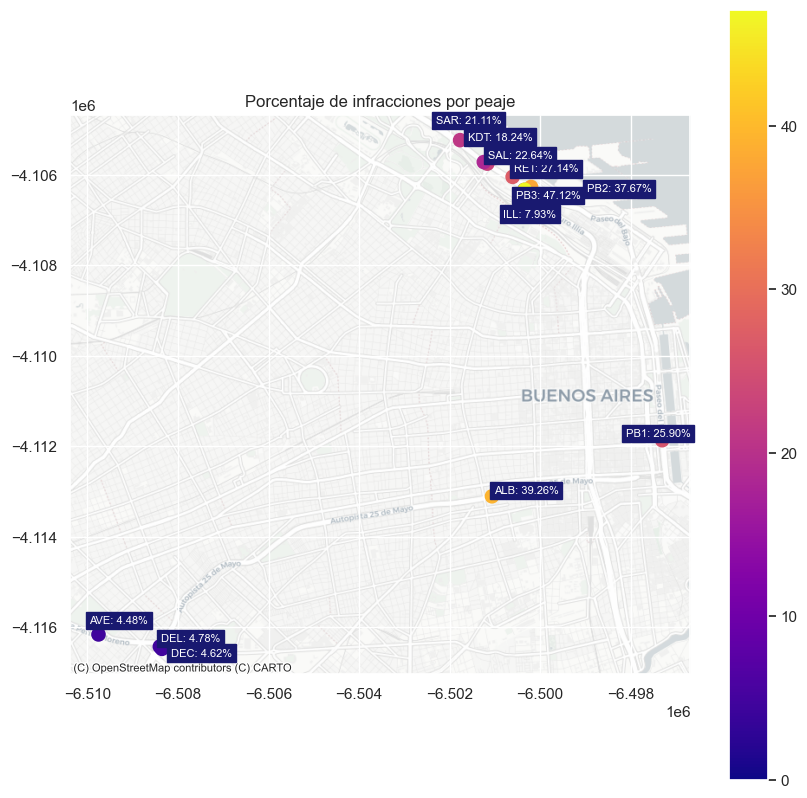

In [14]:

geometry = [Point(float(lat), float(long)) for lat, long in zip(pe_coords["lat"], pe_coords["long"])]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)



violations_text = [f"{p}: {v:.2f}%" for p, v in zip(peajes, violations)]
norm = plt.Normalize(vmin=0, vmax=max(violations))
gdf["violations"] = violations
gdf["txt"]=violations_text
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column="violations", cmap="plasma", markersize=90, legend=True, norm=norm)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

adjust_text([
    ax.text(point.x, point.y, text, backgroundcolor="midnightblue", color="white", fontsize=8)
    for point, text in zip(gdf.geometry, violations_text)
], ax=ax,force_text=(1000,90))

plt.title("Porcentaje de infracciones por peaje")
plt.show()

#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\mapa inf lejos.pdf")

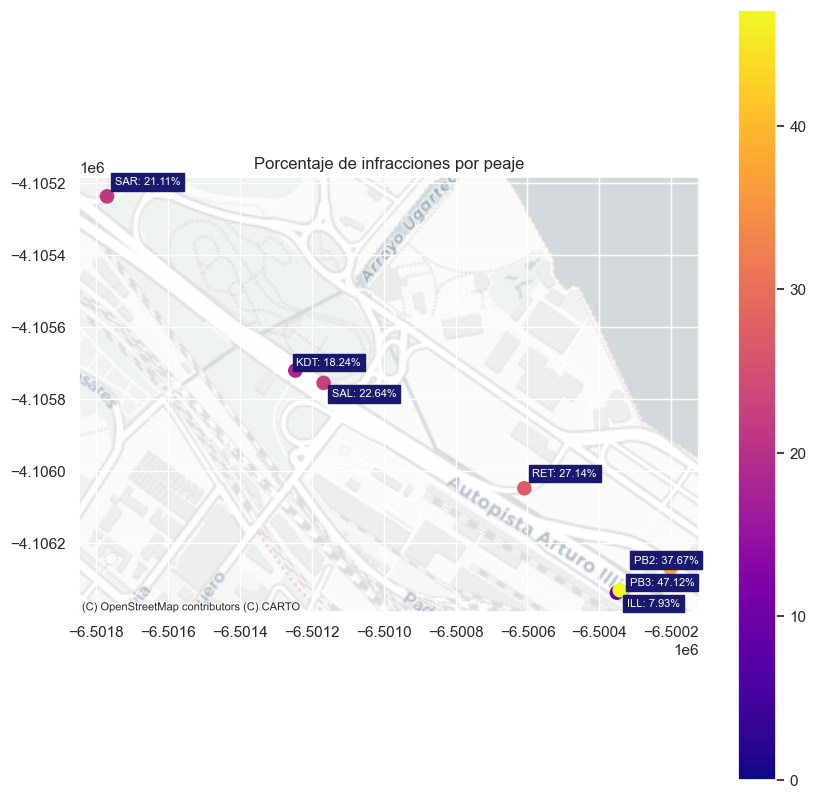

In [15]:

fig, ax = plt.subplots(figsize=(10, 10))
#gdf.plot(ax=ax, column="violations", cmap="plasma", markersize=90, legend=True, norm=norm,zorder = 5)

gdf_clipped = gdf.cx[-6.502e6:-6.498e6, -4.108e6:-4.1045e6]
gdf_clipped.plot(ax=ax,column='violations', cmap='plasma', markersize=90, legend=True, norm=norm)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron,zoom=15)

adjust_text([
    ax.text(point.x, point.y, text, backgroundcolor="midnightblue", color="white", fontsize=8)
    for point, text in zip(gdf_clipped.geometry, gdf_clipped["txt"])
], ax=ax,zorder = 1,avoid_self=(True),force_static=(10,39),force_text=(10,90))



# Selecciona las features dentro del rango de coordenadas

# Grafica el GeoDataFrame recortado

# Ajustar la posición de la leyenda (si es necesario)

plt.title("Porcentaje de infracciones por peaje")
plt.show()


#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\mapa inf 1.pdf")

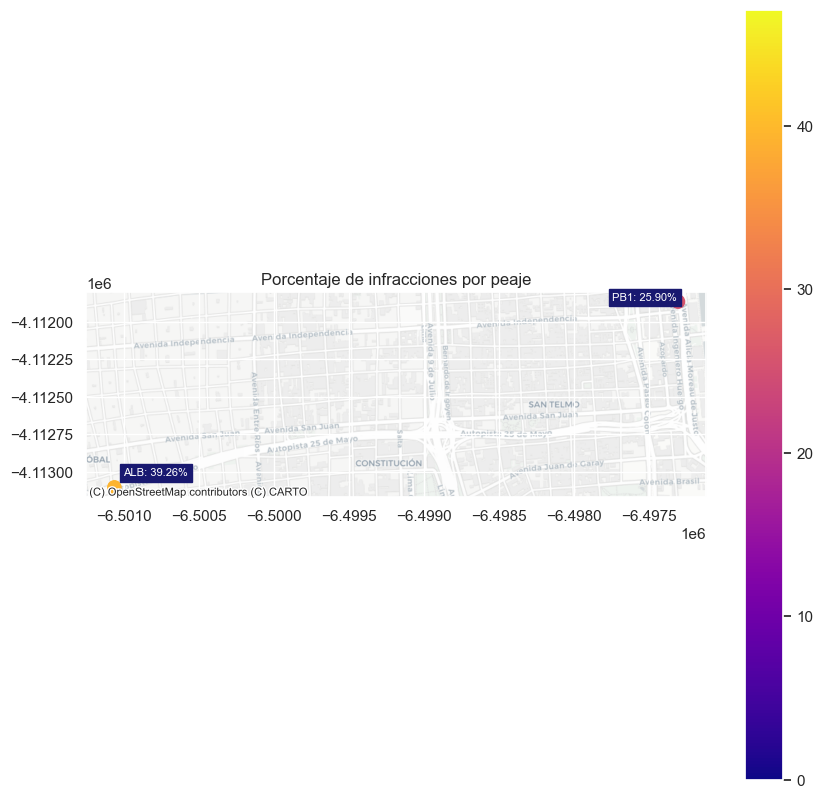

In [16]:

fig, ax = plt.subplots(figsize=(10, 10))
#gdf.plot(ax=ax, column="violations", cmap="plasma", markersize=90, legend=True, norm=norm)

gdf_clipped = gdf.cx[-6.502e6:-6.496e6, -4.114e6:-4.111e6]
gdf_clipped.plot(ax=ax,column='violations', cmap='plasma', markersize=90, legend=True, norm=norm)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron,zoom=15)

adjust_text([
    ax.text(point.x, point.y, text, backgroundcolor="midnightblue", color="white", fontsize=8)
    for point, text in zip(gdf_clipped.geometry, gdf_clipped["txt"])
], ax=ax,force_static=(100,390))



plt.title("Porcentaje de infracciones por peaje")
plt.show()


#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\mapa inf 2.pdf")

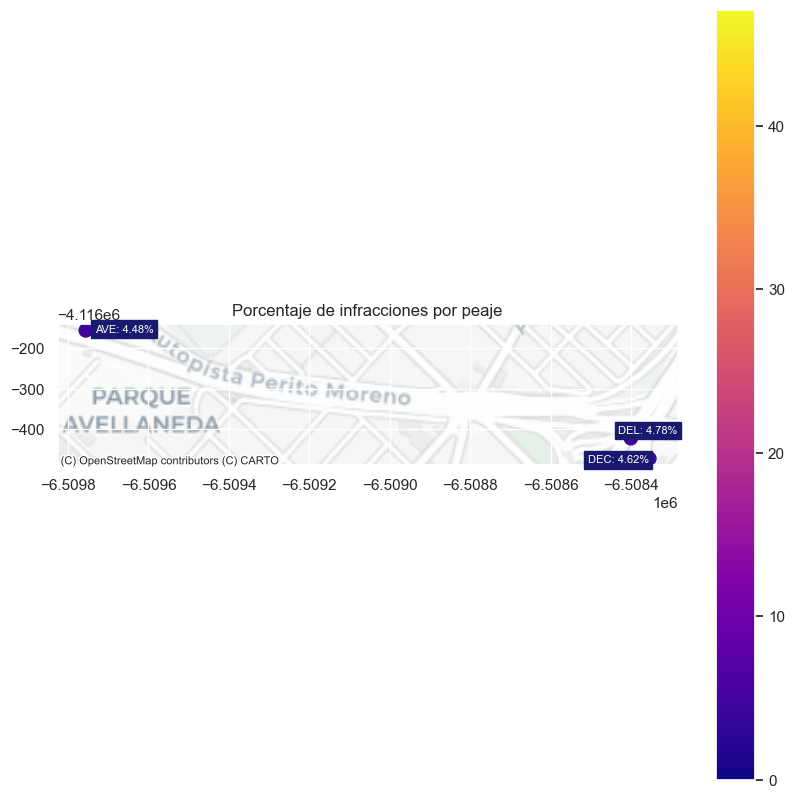

In [17]:

fig, ax = plt.subplots(figsize=(10, 10))
gdf_clipped = gdf.cx[-6.51e6:-6.506e6, -4.1175e6:-4.115e6]
gdf_clipped.plot(ax=ax, column="violations", cmap="plasma", markersize=90, legend=True, norm=norm)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom = 15)

adjust_text([
    ax.text(point.x, point.y, text, backgroundcolor="midnightblue", color="white", fontsize=8)
    for point, text in zip(gdf_clipped.geometry,gdf_clipped["txt"])
], ax=ax,force_static=(100,390))

plt.title("Porcentaje de infracciones por peaje")
plt.show()


#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\mapa inf 3.pdf")

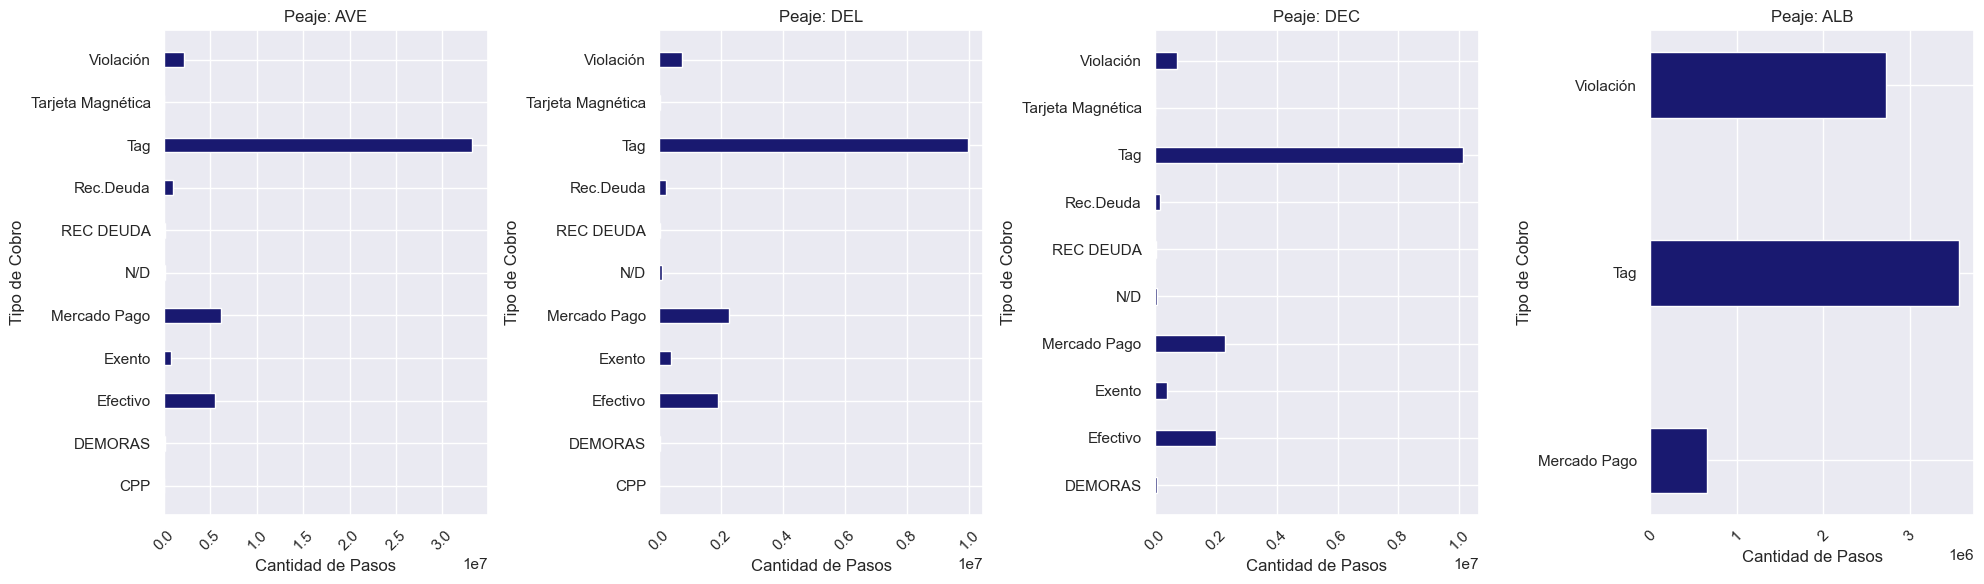

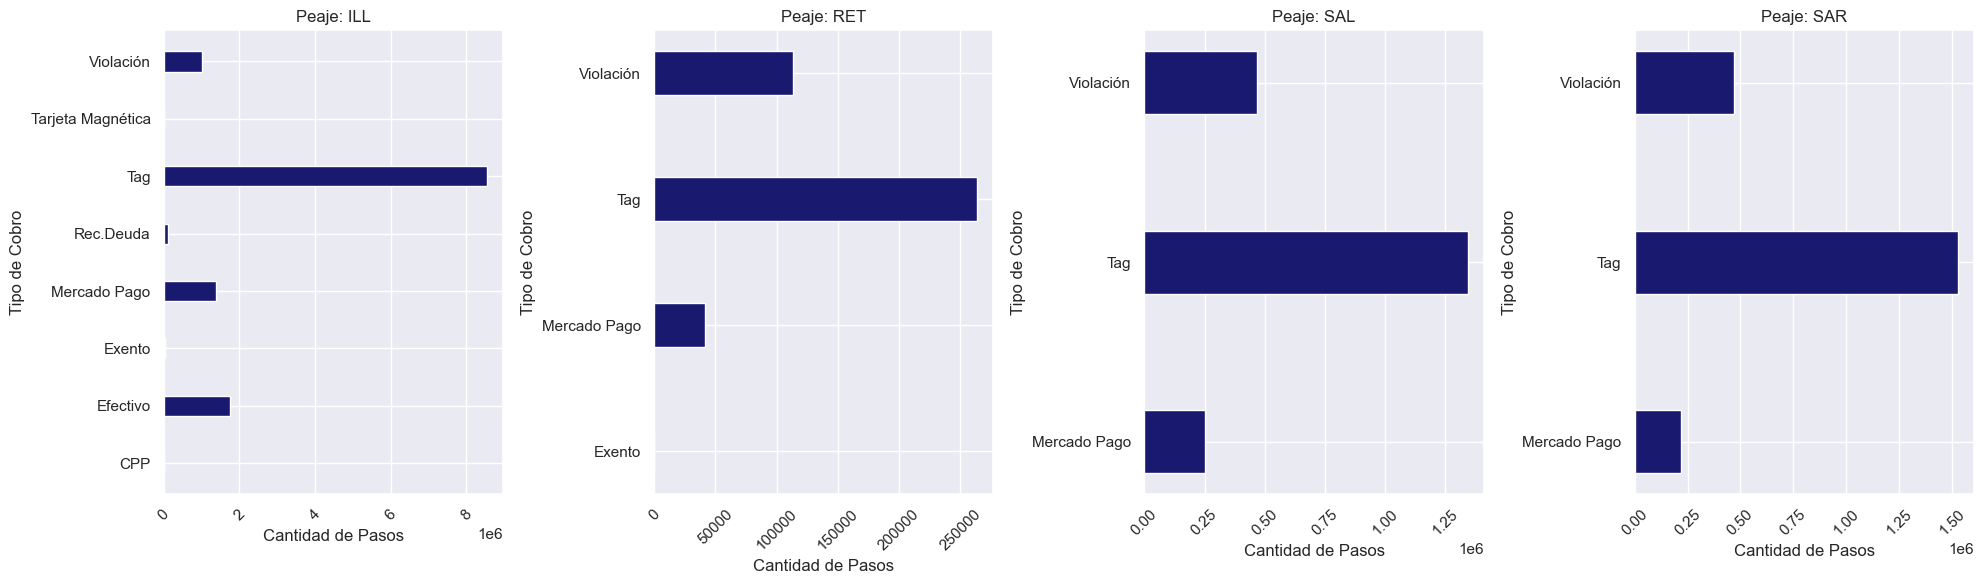

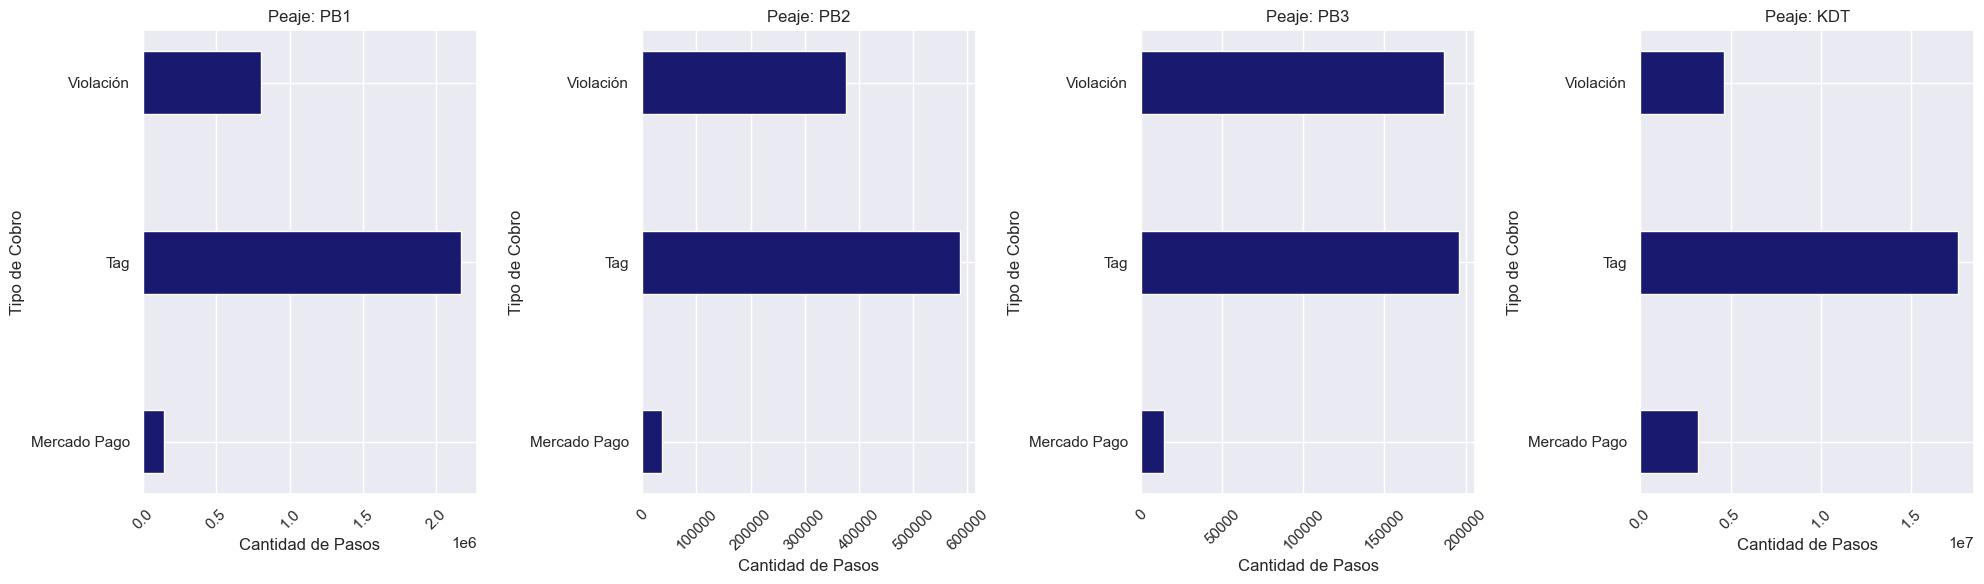

In [18]:

# Dividimos los peajes en 3 grupos
peajes_groups = np.array_split(peajes, 3)

# Iteramos sobre cada grupo para crear las figuras
for group_idx, group in enumerate(peajes_groups):
    fig, axes = plt.subplots(1, len(group), figsize=(20, 6))  # Una fila y tantas columnas como peajes en el grupo
    if len(group) == 1:  # Si hay un solo peaje en el grupo, `axes` no será un array, sino un único objeto
        axes = [axes]
    
    for i, p in enumerate(group):
        cobros = df[df["ID_PEAJE"] == p].groupby("TIPO_COBRO", as_index=False)["PASOS"].sum()
        axes[i].barh(cobros["TIPO_COBRO"], cobros["PASOS"], 0.35, color="midnightblue")
        axes[i].set_title(f"Peaje: {p}")
        axes[i].set_ylabel("Tipo de Cobro")
        axes[i].set_xlabel("Cantidad de Pasos")
        axes[i].tick_params(axis='x', rotation=45)
    
    fig.tight_layout()
    plt.show()

#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\barras2.pdf")

In [19]:


# Crear una nueva columna que indique si "Efectivo" está presente para cada peaje
df["TIENE_EFECTIVO"] = df.groupby("ID_PEAJE")["TIPO_COBRO"].transform(lambda x: "Efectivo" in x.values)

# Separar los dos grupos
grupo_efectivo = df[df["TIENE_EFECTIVO"]]
grupo_no_efectivo = df[~df["TIENE_EFECTIVO"]]
ge = grupo_efectivo.groupby("TIPO_COBRO",as_index=False)["PASOS"].sum()
gne = grupo_no_efectivo.groupby("TIPO_COBRO",as_index=False)["PASOS"].sum()
print("Porcentaje de pasadas según el total para efectivo: ",round(ge["PASOS"].sum()*100/(df["PASOS"].sum()),2))
print("Porcentaje de pasadas según el total para sin efectivo: ",round(gne["PASOS"].sum()*100/(df["PASOS"].sum()),2))

print("Porcentaje de infracciones en peajes con efectivo: ",round(ge[ge["TIPO_COBRO"]=="Violación"]["PASOS"].sum()*100/(ge["PASOS"].sum()),1))
print("Porcentaje de infracciones en peajes sin efectivo: ",round(gne[gne["TIPO_COBRO"]=="Violación"]["PASOS"].sum()*100/(gne["PASOS"].sum()),2))

Porcentaje de pasadas según el total para efectivo:  66.93
Porcentaje de pasadas según el total para sin efectivo:  33.07
Porcentaje de infracciones en peajes con efectivo:  5.0
Porcentaje de infracciones en peajes sin efectivo:  23.6


In [20]:

df["SENTIDO"][6] = "Provincia" #tira error pero funciona :)

C:\Users\lauta\AppData\Local\Temp\ipykernel_28072\186700918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SENTIDO"][6] = "Provincia"


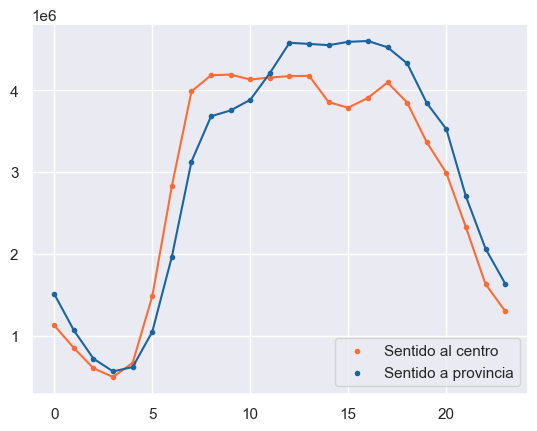

In [21]:

cent = df[df["SENTIDO"] == "Centro"].groupby("HORA", as_index=False)["PASOS"].sum()
prov = df[df["SENTIDO"] == "Provincia"].groupby("HORA", as_index=False)["PASOS"].sum()
#
plt.scatter(cent["HORA"],cent["PASOS"], color = "#ff6b35", label="Sentido al centro",zorder = 1,s=9 )
plt.plot(cent["HORA"],cent["PASOS"], color = "#ff6b35",zorder = 1)
plt.scatter(prov["HORA"],prov["PASOS"], color = "#1a659e", label = "Sentido a provincia",zorder = 5,s=9)
plt.plot(prov["HORA"],prov["PASOS"], color = "#1a659e",zorder = 5)
plt.legend()


#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\horas sentido.pdf")

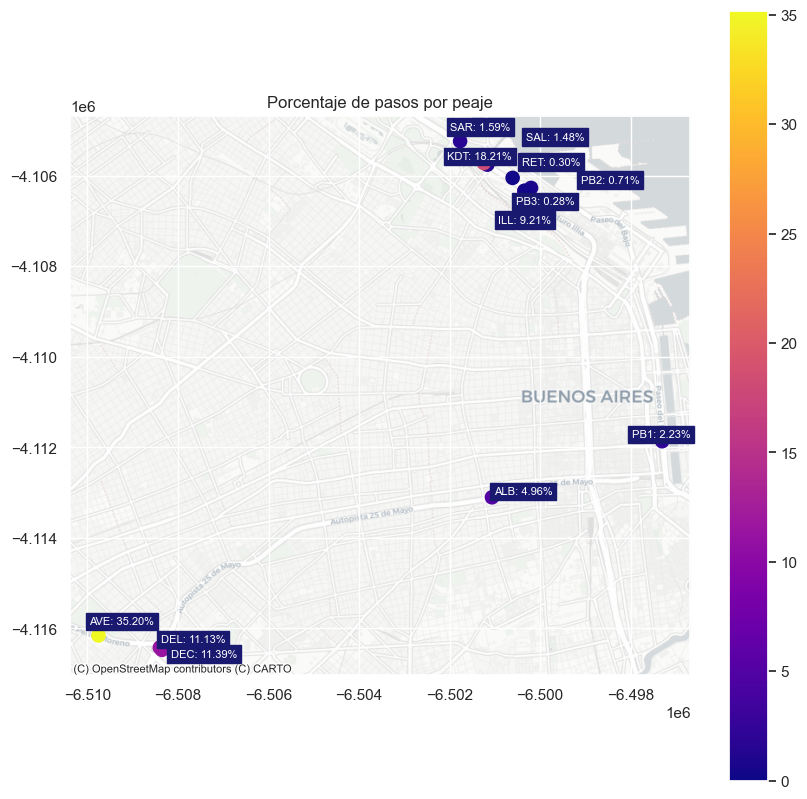

In [22]:

Pasos = []
peajes = []

for i in pe["id_peaje"].unique():
    peaje_data = df[df["ID_PEAJE"] == i]["PASOS"].sum()
    Pasos.append((peaje_data * 100)/df["PASOS"].sum())
    peajes.append(i)


geometry = [Point(float(lat), float(long)) for lat, long in zip(pe_coords["lat"], pe_coords["long"])]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)



pasos_text = [f"{p}: {v:.2f}%" for p, v in zip(peajes, Pasos)]
norm = plt.Normalize(vmin=0, vmax=max(Pasos))
gdf["Pasos"] = Pasos

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column="Pasos", cmap="plasma", markersize=90, legend=True, norm=norm)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

adjust_text([
    ax.text(point.x, point.y, text, backgroundcolor="midnightblue", color="white", fontsize=8)
    for point, text in zip(gdf.geometry, pasos_text)
], ax=ax,force_text=(1000,90))

plt.title("Porcentaje de pasos por peaje")
plt.show()


#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\mapa tot.pdf")

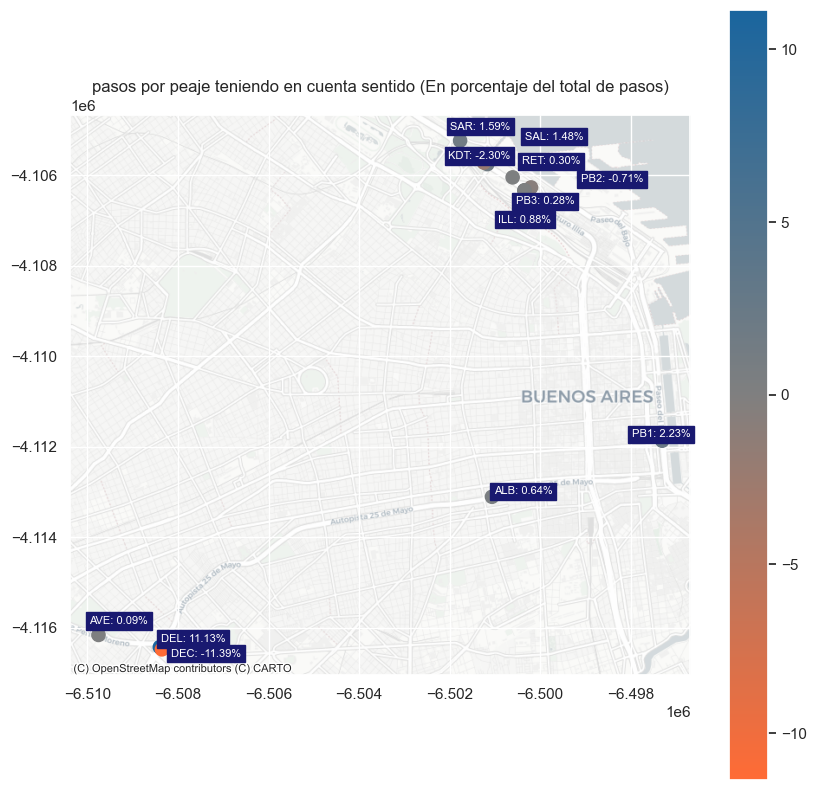

In [23]:

from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from shapely.geometry import Point

# Filtrar los datos según el sentido
prov_df = df[df["SENTIDO"] == "Provincia"]
cent_df = df[df["SENTIDO"] == "Centro"]

# Calcular la diferencia porcentual para cada peaje
Diferencia = []
peajes = []

for i in pe["id_peaje"].unique():
    peaje_data = prov_df[prov_df["ID_PEAJE"] == i]["PASOS"].sum() - cent_df[cent_df["ID_PEAJE"] == i]["PASOS"].sum()
    Diferencia.append((peaje_data * 100) / df["PASOS"].sum())
    peajes.append(i)

# Crear geometría y GeoDataFrame
geometry = [Point(float(lat), float(long)) for lat, long in zip(pe_coords["lat"], pe_coords["long"])]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Crear el colormap personalizado (rojo → gris → verde)
colors = [
    "#ff6b35",  # Rojo para negativos
    (0.5, 0.5, 0.5),  # Gris para valores cercanos a 0
    "#1a659e",  # Verde para positivos
]
custom_cmap = LinearSegmentedColormap.from_list("RedGrayGreen", colors)

# Normalización con 0 como centro
vmin, vmax = min(Diferencia), max(Diferencia)
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Agregar los valores de diferencia al GeoDataFrame
gdf["dif"] = Diferencia

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(
    ax=ax,
    column="dif",             # Columna con los valores a mapear
    cmap=custom_cmap,         # Colormap personalizado
    markersize=90,
    legend=True,
    norm=norm,                # Normalización centrada en 0
)

# Agregar base del mapa
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Ajustar texto de etiquetas
dif_text = [f"{p}: {v:.2f}%" for p, v in zip(peajes, Diferencia)]
adjust_text([
    ax.text(point.x, point.y, text, backgroundcolor="midnightblue", color="white", fontsize=8)
    for point, text in zip(gdf.geometry, dif_text)
], ax=ax, force_text=(1000, 90))

# Título y mostrar el gráfico
plt.title("pasos por peaje teniendo en cuenta sentido (En porcentaje del total de pasos)")
plt.show()


#plt.savefig(r"C:\Users\lauta\Desktop\Proyectos\Aprendiendo ML\peaje\figuras\mapa sent.pdf")